## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
#def build_mlp():
"""Code Here
建立你的神經網路
"""
#    return model

'Code Here\n建立你的神經網路\n'

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum= MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0716 15:05:31.475768 4698633664 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 15:05:31.483462 4698633664 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 15:05:31.600335 4698633664 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 15:05:31.602844 4698633664 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 15:05:31.613846 46

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0716 15:05:31.889712 4698633664 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.2134 - acc: 0.1606 - val_loss: 2.0485 - val_acc: 0.1992
Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.9956 - acc: 0.2368 - val_loss: 1.9208 - val_acc: 0.2766
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8510 - acc: 0.3151 - val_loss: 1.8436 - val_acc: 0.3047
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8120 - acc: 0.3389 - val_loss: 1.8149 - val_acc: 0.3378
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7811 - acc: 0.3574 - val_loss: 1.8869 - val_acc: 0.3211
Epoch 6/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.8860 - acc: 0.3117 - val_loss: 1.8962 - val_acc: 0.3179
Epoch 7/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7739 - acc: 0.3600 - val_loss: 1.8616 - 

Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6048 - acc: 0.4298 - val_loss: 1.5865 - val_acc: 0.4325
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5098 - acc: 0.4628 - val_loss: 1.5241 - val_acc: 0.4503
Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4490 - acc: 0.4829 - val_loss: 1.4986 - val_acc: 0.4702
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4006 - acc: 0.5020 - val_loss: 1.4654 - val_acc: 0.4716
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3591 - acc: 0.5171 - val_loss: 1.4034 - val_acc: 0.4975
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3273 - acc: 0.5300 - val_loss: 1.4022 - val_acc: 0.5035
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2860 - acc: 0.5421 - val_loss: 1.4151 - val_acc: 0.4961
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 128us/step - loss: 1.7363 - acc: 0.3899 - val_loss: 1.7010 - val_acc: 0.4058
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6777 - acc: 0.4117 - val_loss: 1.6502 - val_acc: 0.4270
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6312 - acc: 0.4289 - val_loss: 1.6102 - val_acc: 0.4376
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5897 - acc: 0.4420 - val_loss: 1.5790 - val_acc: 0.4430
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5559 - acc: 0.4541 - val_loss: 1.5502 - val_acc: 0.4575
Epoch 8/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5255 - acc: 0.4667 - val_loss: 1.5357 - val_acc: 0.4611
Epoch 9/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.4974 - acc: 0.4758 - val_loss: 1.5105 - val_acc: 0.4674
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 154us/step - loss: 1.9823 - acc: 0.3078 - val_loss: 1.9615 - val_acc: 0.3138
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9435 - acc: 0.3209 - val_loss: 1.9287 - val_acc: 0.3222
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.9131 - acc: 0.3326 - val_loss: 1.9036 - val_acc: 0.3399
Epoch 7/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8885 - acc: 0.3420 - val_loss: 1.8806 - val_acc: 0.3421
Epoch 8/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.8681 - acc: 0.3490 - val_loss: 1.8619 - val_acc: 0.3523
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8505 - acc: 0.3546 - val_loss: 1.8477 - val_acc: 0.3540
Epoch 10/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8355 - acc: 0.3600 - val_loss: 1.8319 - val_acc: 0.3601
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 124us/step - loss: 2.2337 - acc: 0.2028 - val_loss: 2.2275 - val_acc: 0.1940
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2208 - acc: 0.2114 - val_loss: 2.2150 - val_acc: 0.2044
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.2085 - acc: 0.2215 - val_loss: 2.2027 - val_acc: 0.2141
Epoch 8/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1965 - acc: 0.2283 - val_loss: 2.1910 - val_acc: 0.2222
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1850 - acc: 0.2342 - val_loss: 2.1797 - val_acc: 0.2303
Epoch 10/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1739 - acc: 0.2382 - val_loss: 2.1688 - val_acc: 0.2350
Epoch 11/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1632 - acc: 0.2447 - val_loss: 2.1583 - val_acc: 0.2402
Epoch 12/50
50000/50000 [==================

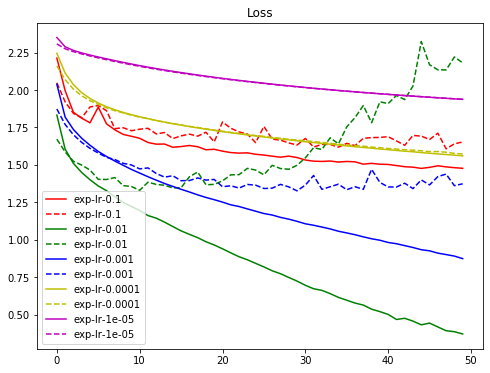

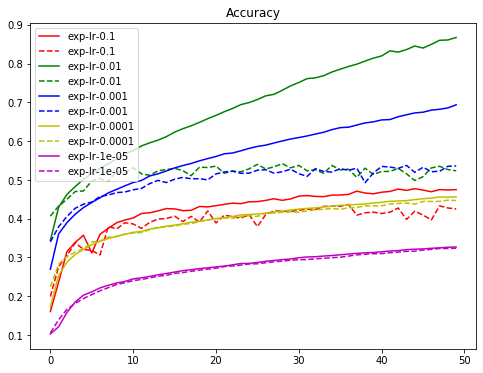

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()